In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the Data

In [2]:
data = pd.read_csv('./insurance.csv')

In [3]:
# list of all the features
features = [[1] * data.shape[0]]
# output variable - insurance charges
y = data['charges'].values
for column in data: 
    # print(column, ' -> ', end = '')
    # print(type(data[column].values))
    if column != 'charges' : 
        features.append(list(data[column].values))

features = np.array(features)
features = features.transpose()
m = len(features)
n = len(features[0])

### Normalisation

In [4]:
for i in range(1, len(features)) :
    u = features[i].mean()
    std = features[i].std()
    features[i] = (features[i] - u)/std;

In [5]:
def hypothesis(xi, theta) :
    hx = 0
    for j in range(len(xi)) :
        hx += xi[j] * theta[j]
    return hx;

def gradient(features, y, theta) :
    grad = np.zeros((m,))
    for j in range(n) :
        for i in range(m) :
            hx = hypothesis(features[i], theta)
            grad[j] += (hx - y[i])*features[i][j]
    
    return grad/m


def cost(features, y, theta):
    cost = float(0.0)
    for i in range(m):
        hx = hypothesis(features[i], theta)
        cost += (hx - y[i])**2
    return cost

def gradientDescent(features, y, steps = 1000, alpha = 0.03) :
    theta = np.zeros((n,))
    errorList = []

    for i in range(steps) :
        grad = gradient(features, y, theta)
        e = cost(features, y, theta)
        errorList.append(e)
        
        for j in range(n) :
            theta[j] = theta[j] - alpha*grad[j]
        
    return theta,errorList



In [6]:
theta,errorList = gradientDescent(features, y)

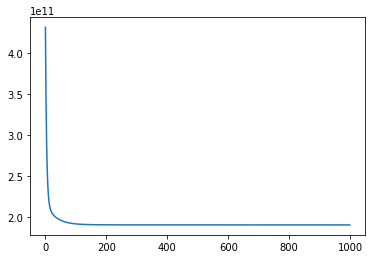

In [7]:
plt.plot(errorList)
plt.show()